# Predicting the Success of a Movie
### Contributors: Donald Fung, Justin Shaw, Jennifer Koh

## Outline

1) Budget? Does budget correlate to total revenue? <br>
2) How does runtime affect total revenue? <br>
3) What genre typically grosses most? <br>
4) How do ratings effect a movies success? <br>
5) Try and predict based off these variables. <br>

## 1) Introduction
The overall objective of this project is to analyze movies from the 1900s to 2017. By studying the genre, production budget, ratings, and overall gross, we tidy movie data in order to determine what contributes to the best movies that are released. This may help determine what factors a movie should have when producers are directing a movie.

## 2) Data Collection

The first step is to collect the data from an excel file. Luckily, this data from Kaggle had all the information about a movie from the 1990s to 2017. 

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('movies_metadata.csv')
data

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


## 3) Data Tidying

Because there was a lot of unnecessary data, we decided to remove the columns adult, belongs to collection, homepage, overview, spoken languages, tagline, video, poster path, production companies, production countries, original language, original tite, vote count, id, and imdb id to create a tidier data that met our needs. <br>
Since the genre was in a string that had other information, we parsed the genres and put it into an array. <br>
If the budget or revenue column contained "0's" or anything non-related to numbers, we removed those columns because it could affect the data when comparing it to other numbers. <br>
We also decided to limit the movies to the first 500 based on worldwide gross because we are comparing genre, runtime, budget and vote average to it.

In [2]:
data = data.drop(['adult', 'belongs_to_collection', 'homepage', 'overview', 'spoken_languages', 'tagline', 'video', 'poster_path', 'production_companies', 'production_countries', 'original_language', 'original_title', 'vote_count', 'id', 'imdb_id'], axis=1)
data = data[data.budget != '0']
data = data[data.revenue != 0.0]
data = data[['title', 'release_date', 'genres', 'budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'status']]

data = data.rename(columns = {"revenue" : "worldwidegross"})
genre = []
for i in range(data.shape[0]):
    temp = data.iloc[i].genres
    genres = re.findall('\w+\s\w+|\w+', temp)
    genres = [genres[x*4-1] for x in range(int(len(genres)/4))]
    genre.append(genres)
    
data['genres'] = genre

data = data[~data.budget.str.contains("jpg")]
data['budget'] = data['budget'].astype(str).astype(int)
data = data.sort_values(by=['worldwidegross'], ascending = False)
data = data[:500]
data = data.reset_index()
data

,index,title,release_date,genres,budget,worldwidegross,popularity,runtime,vote_average,status
0,14551,Avatar,2009-12-10,"[Science Fiction, Action, Adventure, Fantasy]",237000000,2.787965e+09,185.071,162.0,7.2,Released
1,26555,Star Wars: The Force Awakens,2015-12-15,"[Fantasy, Action, Adventure, Science Fiction]",245000000,2.068224e+09,31.626,136.0,7.5,Released
2,1639,Titanic,1997-11-18,"[Thriller, Drama, Romance]",200000000,1.845034e+09,26.8891,194.0,7.5,Released
3,17818,The Avengers,2012-04-25,"[Adventure, Science Fiction, Action]",220000000,1.519558e+09,89.8876,143.0,7.4,Released
4,25084,Jurassic World,2015-06-09,"[Thriller, Action, Adventure, Science Fiction]",150000000,1.513529e+09,32.7905,124.0,6.5,Released
5,28830,Furious 7,2015-04-01,[Action],190000000,1.506249e+09,27.2757,137.0,7.3,Released
6,26558,Avengers: Age of Ultron,2015-04-22,"[Science Fiction, Action, Adventure]",280000000,1.405404e+09,37.3794,141.0,7.3,Released
7,17437,Harry Potter and the Deathly Hallows: Part 2,2011-07-07,"[Adventure, Family, Fantasy]",125000000,1.342000e+09,24.9907,130.0,7.9,Released
8,22110,Frozen,2013-11-27,"[Family, Animation, Adventure]",150000000,1.274219e+09,24.2482,102.0,7.3,Released
9,42222,Beauty and the Beast,2017-03-16,"[Romance, Family, Fantasy]",160000000,1.262886e+09,287.253654,129.0,6.8,Released


# We decided to add values to genre to (EDIT THIS)

In [3]:
count_genres = {}
for genre in data['genres']:
    for instance in genre:
        if instance not in count_genres:
            count_genres[instance] = 1
        else:
            count_genres[instance] = count_genres[instance]+1

total = sum(count_genres.values())
for key in count_genres.keys():
    count_genres[key] = count_genres[key]/total
count_genres

genre_value = []
for genre in data['genres']:
    val = 0
    for instance in genre:
        val = val + count_genres[instance]
    genre_value.append(val)
    
data['genre_value'] = genre_value
data

,index,title,release_date,genres,budget,worldwidegross,popularity,runtime,vote_average,status,genre_value
0,14551,Avatar,2009-12-10,"[Science Fiction, Action, Adventure, Fantasy]",237000000,2.787965e+09,185.071,162.0,7.2,Released,0.470250
1,26555,Star Wars: The Force Awakens,2015-12-15,"[Fantasy, Action, Adventure, Science Fiction]",245000000,2.068224e+09,31.626,136.0,7.5,Released,0.470250
2,1639,Titanic,1997-11-18,"[Thriller, Drama, Romance]",200000000,1.845034e+09,26.8891,194.0,7.5,Released,0.193858
3,17818,The Avengers,2012-04-25,"[Adventure, Science Fiction, Action]",220000000,1.519558e+09,89.8876,143.0,7.4,Released,0.387716
4,25084,Jurassic World,2015-06-09,"[Thriller, Action, Adventure, Science Fiction]",150000000,1.513529e+09,32.7905,124.0,6.5,Released,0.465131
5,28830,Furious 7,2015-04-01,[Action],190000000,1.506249e+09,27.2757,137.0,7.3,Released,0.147153
6,26558,Avengers: Age of Ultron,2015-04-22,"[Science Fiction, Action, Adventure]",280000000,1.405404e+09,37.3794,141.0,7.3,Released,0.387716
7,17437,Harry Potter and the Deathly Hallows: Part 2,2011-07-07,"[Adventure, Family, Fantasy]",125000000,1.342000e+09,24.9907,130.0,7.9,Released,0.338452
8,22110,Frozen,2013-11-27,"[Family, Animation, Adventure]",150000000,1.274219e+09,24.2482,102.0,7.3,Released,0.319258
9,42222,Beauty and the Beast,2017-03-16,"[Romance, Family, Fantasy]",160000000,1.262886e+09,287.253654,129.0,6.8,Released,0.212412


## 4a) Budget? Does budget correlate to total revenue? 
Since there were around 5,000 movies, we reduced the number of movies we looked at to 500. By sorting the budget and removing unnecessary columns, we could see that Pirates of the Caribbean: On Stranger Tides had the highest budget with a $1,045,714,000 worldwide gross. To see if this was normal, we graphed this in the next section. <br>

In [4]:
data2 = data.sort_values(by='budget', ascending=False)
data2 = data2[['title', 'budget', 'worldwidegross']]
data2

,title,budget,worldwidegross
22,Pirates of the Caribbean: On Stranger Tides,380000000,1.045714e+09
32,Pirates of the Caribbean: At World's End,300000000,9.610000e+08
6,Avengers: Age of Ultron,280000000,1.405404e+09
248,Superman Returns,270000000,3.910812e+08
128,Tangled,260000000,5.917949e+08
437,John Carter,260000000,2.841391e+08
125,Transformers: The Last Knight,260000000,6.049421e+08
44,Spider-Man 3,258000000,8.908716e+08
18,The Dark Knight Rises,250000000,1.084939e+09
26,The Hobbit: An Unexpected Journey,250000000,1.021104e+09


Using budget and worldwide gross, we used seaborn to graph both to see a correlation. It is clear that with the first 500 budgets that is sorted, that there is a positive correlation; as budget increases, it is more likely that the worldwide gross will increase as well. <br>
This makes sense because if people put more money into a movie, then the production quality would be better which would result in more ticket sales. <br>
However, depending on other factors, there could be a reason why when there is a big budget, the worldwide gross happens to be below the line of best fit.

Text(0.5, 1.0, 'Revenue vs Worldwide Gross')

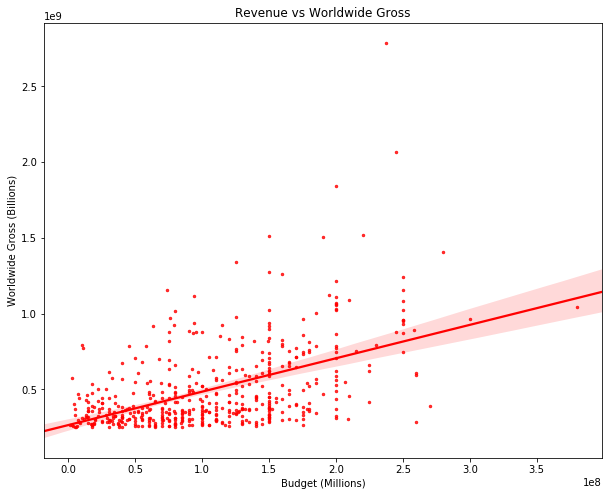

In [5]:
plt1, ax = plt.subplots()
plt1.set_size_inches(10.0, 8.0)  

plt1 = sns.regplot(x="budget", y="worldwidegross", color = "red", scatter_kws={'s':6} ,data=data2).set_title("Revenue vs Worldwide Gross")
plt.xlabel("Budget (Millions)")
plt.ylabel("Worldwide Gross (Billions)")
plt1

# 4b) How does runtime affect total revenue?

By sorting the runtime and removing unnecessary columns, we could see that Gone with the Wind had the longest runtime with a $400,176,500 worldwide gross. To see if this was normal, we graphed this in the next section.

In [6]:
data3 = data.sort_values(by='runtime', ascending=False)
data3 = data3[['title', 'runtime', 'worldwidegross']]
data3

,title,runtime,worldwidegross
242,Gone with the Wind,238.0,4.001765e+08
15,The Lord of the Rings: The Return of the King,201.0,1.118889e+09
357,Schindler's List,195.0,3.213656e+08
2,Titanic,194.0,1.845034e+09
436,The Green Mile,189.0,2.846000e+08
145,King Kong,187.0,5.500000e+08
203,Pearl Harbor,183.0,4.492209e+08
221,Dances with Wolves,181.0,4.242088e+08
247,The Wolf of Wall Street,180.0,3.920007e+08
39,The Lord of the Rings: The Two Towers,179.0,9.262874e+08


Using runtime and worldwide gross, we used seaborn to graph both to see a correlation. From looking at the graph, there does not seem to be a correlation between how long a movie is run versus the worldwide gross. A lot of the movies that have a runtime of around 100 minutes seem to almost have a worldwide gross of 1 billion. As you increase the runtime, the worldwide gross happens to be the same.


[[1.         0.29163506]
 [0.29163506 1.        ]]


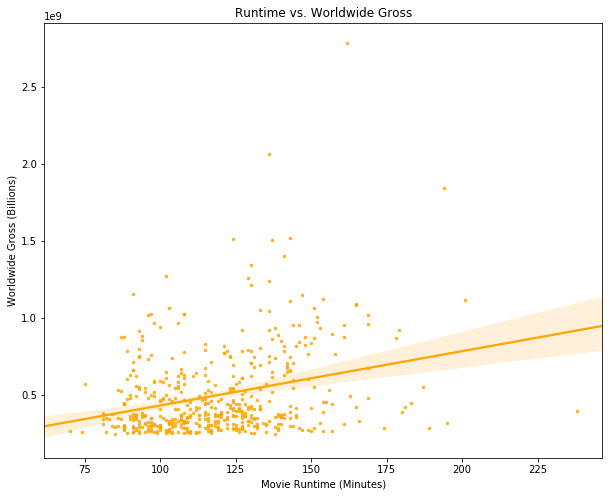

In [7]:
# Plot runtime vs revenue 
plt2, ax2 = plt.subplots()
plt2.set_size_inches(10.0, 8.0)  

runtimeplot = sns.regplot(x = 'runtime', y = 'worldwidegross', color = "orange", scatter_kws={'s':6}, data=data3).set_title("Runtime vs. Worldwide Gross")
plt.xlabel("Movie Runtime (Minutes)")
plt.ylabel("Worldwide Gross (Billions)")
runtimeplot
print(np.corrcoef(data['runtime'].values, data['worldwidegross'].values))

Removing the outliers gives us a closer look on the points around the line of best fit. Looking at all these points, they seem to be scattered either above or below the line. Most of the movies average around 125 minutes for runtime, but the worldwide gross happens to be below the line as well.

Text(0.5, 1.0, 'Runtime vs. Worldwide Gross')

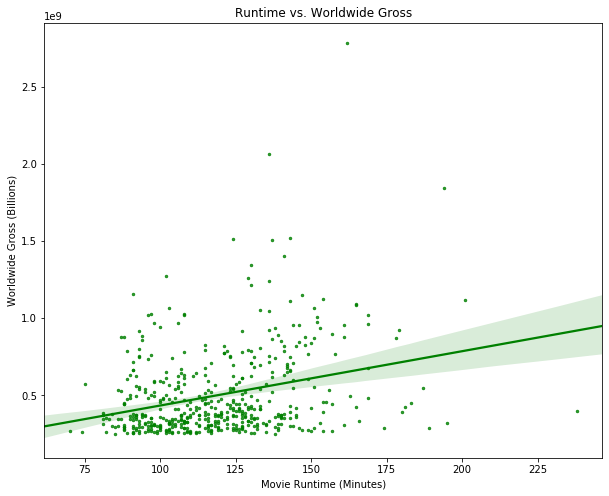

In [8]:
newruntimeplot, ax2 = plt.subplots()
newruntimeplot.set_size_inches(10.0, 8.0) 

newruntimeplot = sns.regplot(x = 'runtime', y = 'worldwidegross', color = "green", scatter_kws={'s':6}, data=data3).set_title("Runtime vs. Worldwide Gross")
plt.xlabel("Movie Runtime (Minutes)")
plt.ylabel("Worldwide Gross (Billions)")
newruntimeplot

## 4c)  What genre typically grosses most?

In [9]:
data4 = data.sort_values(by='genre_value', ascending=False)
data4 = data4[['title', 'genre_value', 'worldwidegross']]
data4

,title,genre_value,worldwidegross
153,Brave,0.648752,5.389832e+08
123,How to Train Your Dragon 2,0.648752,6.091230e+08
418,G-Force,0.585413,2.928178e+08
231,Night at the Museum: Battle of the Smithsonian,0.585413,4.131062e+08
135,Night at the Museum,0.585413,5.744808e+08
182,Teenage Mutant Ninja Turtles,0.570058,4.772000e+08
27,Despicable Me 3,0.566219,1.020063e+09
107,Big Hero 6,0.566219,6.521054e+08
162,Kung Fu Panda 3,0.566219,5.211708e+08
474,The Fifth Element,0.547665,2.639202e+08


Text(0.5, 1.0, 'Genre vs Worldwide Gross')

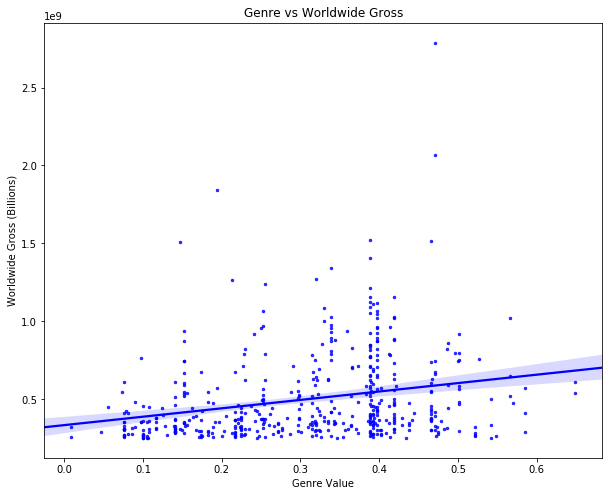

In [10]:
plt2, ax2 = plt.subplots()
plt2.set_size_inches(10.0, 8.0)   

plt2 = sns.regplot(x="genre_value", y="worldwidegross", color = "blue", scatter_kws={'s':6} ,data=data4).set_title("Genre vs Worldwide Gross")
plt.xlabel("Genre Value")
plt.ylabel("Worldwide Gross (Billions)")
plt2

In [11]:
worldwidegross = [['Science Fiction', 0],
            ['Action', 0],
           ['Adventure', 0],
           ['Fantasy', 0],
           ['Thriller', 0],
           ['Drama', 0],
           ['Romance', 0],
           ['Family', 0], 
           ['Animation', 0],
           ['Crime', 0],
           ['Comedy', 0],
           ['Mystery', 0],
           ['Music', 0], 
           ['Horror', 0],
           ['War', 0],
           ['Western', 0],
           ['History', 0]]
genresRev = pd.DataFrame(worldwidegross, columns = ['Genre', 'worldwidegross'])
genresRev

,Genre,worldwidegross
0,Science Fiction,0
1,Action,0
2,Adventure,0
3,Fantasy,0
4,Thriller,0
5,Drama,0
6,Romance,0
7,Family,0
8,Animation,0
9,Crime,0


Text(0, 0.5, 'Total Worldwide Gross (Billions)')

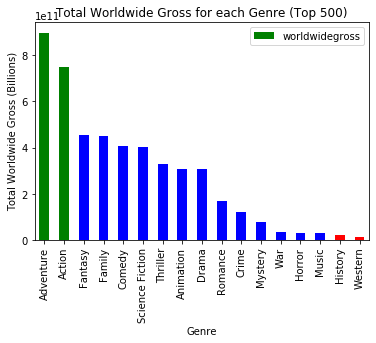

In [22]:
for i, j in data.iterrows():
    for genre in data['genres'][i]:
        genresRev.loc[genresRev['Genre'] == genre, 'worldwidegross'] += data['worldwidegross'][i]
                
genresRev = genresRev.sort_values(by=['worldwidegross'], ascending = False)
bar_colors = ['g', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r']

genreHist = genresRev.plot.bar(x='Genre', y = 'worldwidegross', color=bar_colors)
plt.title("Total Worldwide Gross for each Genre (Top 500)")
plt.xlabel("Genre")
plt.ylabel("Total Worldwide Gross (Billions)")

## 4d) How do ratings effect a movies success?

In [13]:
data5 = data.sort_values(by='vote_average', ascending=False)
data5 = data5[['title', 'vote_average', 'worldwidegross']]
data5

,title,vote_average,worldwidegross
357,Schindler's List,8.3,3.213656e+08
28,The Dark Knight,8.3,1.004558e+09
449,Spirited Away,8.3,2.749251e+08
218,The Intouchables,8.2,4.264809e+08
154,The Empire Strikes Back,8.2,5.384000e+08
98,Forrest Gump,8.2,6.779454e+08
436,The Green Mile,8.2,2.846000e+08
350,Se7en,8.1,3.273119e+08
58,Inception,8.1,8.255328e+08
72,Star Wars,8.1,7.753980e+08


Text(0, 0.5, 'Worldwide Gross (Billions)')

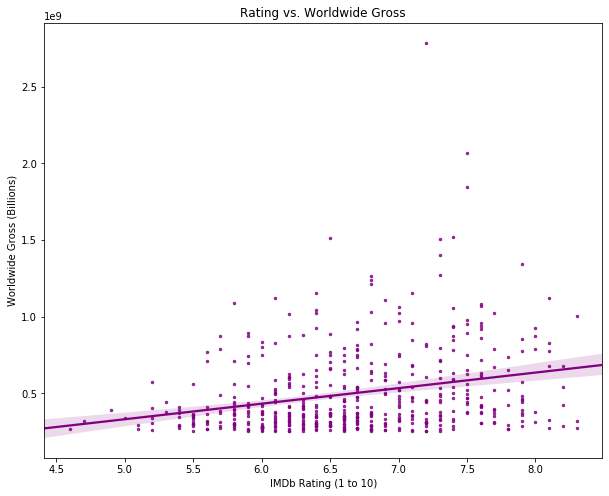

In [14]:
ratingplot, ax2 = plt.subplots()
ratingplot.set_size_inches(10.0, 8.0) 

ratingplot = sns.regplot(x = 'vote_average', y = 'worldwidegross', data=data5, color = "purple", scatter_kws={'s':6}).set_title("Rating vs. Worldwide Gross")
plt.xlabel("IMDb Rating (1 to 10)")
plt.ylabel("Worldwide Gross (Billions)")

Text(0.5, 1.0, 'Rating vs. Worldwide Gross')

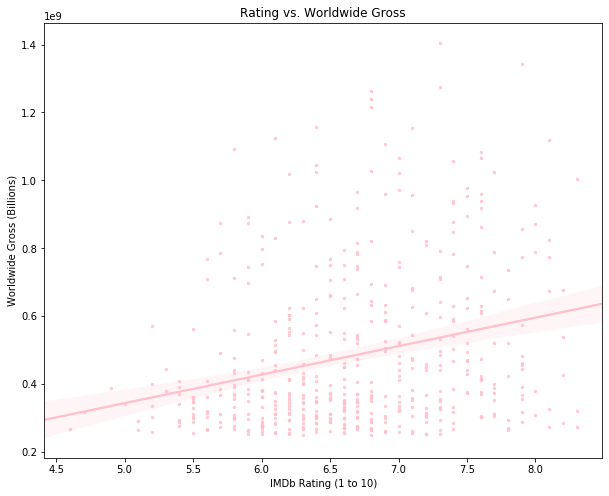

In [15]:
# Remove outliers 
newratingplot, ax2 = plt.subplots()
newratingplot.set_size_inches(10.0, 8.0)  

nooutlierdata = data[data.worldwidegross < 1500000000]
newratingplot = sns.regplot(x = 'vote_average', y = 'worldwidegross', color = "pink", scatter_kws={'s':6}, data=nooutlierdata).set_title("Rating vs. Worldwide Gross")
plt.xlabel("IMDb Rating (1 to 10)")
plt.ylabel("Worldwide Gross (Billions)")
newratingplot

## 4e) Try and predict based off these variables.

In [16]:
from sklearn import linear_model
X = data[['budget', 'runtime', 'vote_average', 'genre_value']]
y = data[['worldwidegross']]
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
coefficients = lm.coef_
print('Regression Equation = ' + str(coefficients[0][0]) + 'a + ' + str(coefficients[0][1]) + 'b + ' + str(coefficients[0][2]) + 'c + ' + str(coefficients[0][3]) + 'd')

Regression Equation = 2.0915844198249762a + 1015338.5851081708b + 114865161.33975784c + 195405753.38673532d


link to this somewhere and rename this ->[hello](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#x-unbalanced-header)

R^2 Value = 0.3685465460244114


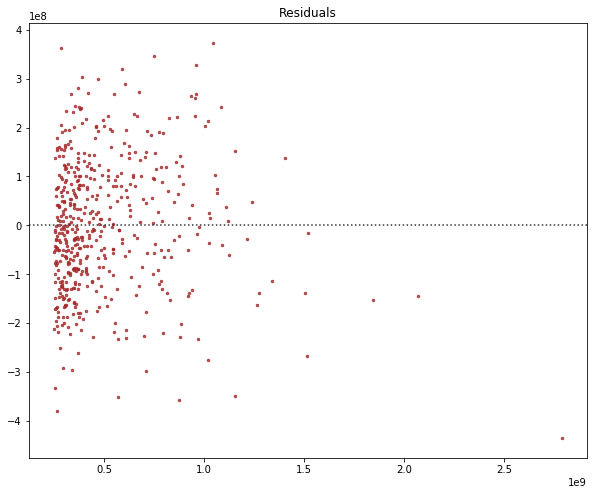

In [17]:
plt3, ax = plt.subplots()
plt3.set_size_inches(10.0, 8.0)  

predictions = lm.predict(X)

print('R^2 Value = ' + str(lm.score(X,y)))
plt3 = sns.residplot(y.values, predictions,color = "brown",scatter_kws={'s':6} ).set_title("Residuals")

## Conclusion